# Group Proposal

Group Member: Erin Da, Lesley Mai, Xiaofei Sun, Yuchen Xu (Group 46)

## 1. Introduction

Dropout rates and academic success play vital roles within higher education institutions, the academic success not only affects individual students but also affects society at large. Therefore, harnessing the available data to predict students’ dropout and academic success status holds significant worth.

This dataset is created from a higher education institution related to students enrolled in different undergraduate degrees. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.

This project highlights key factors that lead students to drop out, with the major cause being Academic performance, financial conditions, and family environment.

Given a student with below related features, we can classify the student’s academic status (enrolled, graduate or dropout).

## 2. Preliminary exploratory data analysis

First, we load the needed packages below  which will be useful in the upcoming phases of our analysis.

In [1]:
# packages
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Our dataset is formatted as a `.csv` file with headers. We will use `read_delim()`to load our data in for wrangling. We must first filter in on observations between 2011 to 2021 (inclusive), since the data is not complete for values outside that range.

In [8]:
# load data
students_data <- read_delim("https://raw.githubusercontent.com/lesleymai/ds_group/main/academic_success.csv", show_col_types = FALSE)
colnames(students_data) <- make.names(colnames(students_data))
head(students_data)

Marital.status,Application.mode,Application.order,Course,Daytime.evening.attendance.,Previous.qualification,Previous.qualification..grade.,Nacionality,Mother.s.qualification,Father.s.qualification,⋯,Curricular.units.2nd.sem..credited.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..evaluations.,Curricular.units.2nd.sem..approved.,Curricular.units.2nd.sem..grade.,Curricular.units.2nd.sem..without.evaluations.,Unemployment.rate,Inflation.rate,GDP,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,17,5,171,1,1,122.0,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160.0,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122.0,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122.0,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100.0,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,39,1,9991,0,19,133.1,1,37,37,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate


In [ ]:
# Count the number of rows containing at least one NA
num_na_rows <- sum(apply(is.na(students_data), 1, any))
print(num_na_rows)

In this project, we will choose below columns for prediction.

In [3]:
students_data <- students_data |>
    select(Course, 
           Daytime.evening.attendance., 
           Mother.s.qualification, 
           Father.s.qualification, 
           Mother.s.occupation, 
           Father.s.occupation, 
           Admission.grade,
           Displaced, 
           Debtor, 
           Scholarship.holder, 
           Curricular.units.1st.sem..enrolled.,
           Curricular.units.1st.sem..grade.,
           Curricular.units.2nd.sem..enrolled.,
           Curricular.units.2nd.sem..grade.,
           Target)
head(students_data)

Course,Daytime.evening.attendance.,Mother.s.qualification,Father.s.qualification,Mother.s.occupation,Father.s.occupation,Admission.grade,Displaced,Debtor,Scholarship.holder,Curricular.units.1st.sem..enrolled.,Curricular.units.1st.sem..grade.,Curricular.units.2nd.sem..enrolled.,Curricular.units.2nd.sem..grade.,Target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
171,1,19,12,5,9,127.3,1,0,0,0,0.00000,0,0.00000,Dropout
9254,1,1,3,3,3,142.5,1,0,0,6,14.00000,6,13.66667,Graduate
9070,1,37,37,9,9,124.8,1,0,0,6,0.00000,6,0.00000,Dropout
9773,1,38,37,5,3,119.6,1,0,0,6,13.42857,6,12.40000,Graduate
8014,0,37,38,9,9,141.5,0,0,0,6,12.33333,6,13.00000,Graduate
9991,0,37,37,9,7,114.8,0,1,0,5,11.85714,5,11.50000,Graduate


In [4]:
student_split <- initial_split(students_data, prop = 0.75, strata = Target)

student_train <- training(student_split)
student_test <- testing(student_split) 


In [7]:
student_train <- student_train |>
    group_by(Mother.s.occupation) |>
    summarize(count = n())
    
head(student_train)

Mother.s.occupation,count
<dbl>,<int>
0,1
1,1
2,1
3,1
4,1
5,1


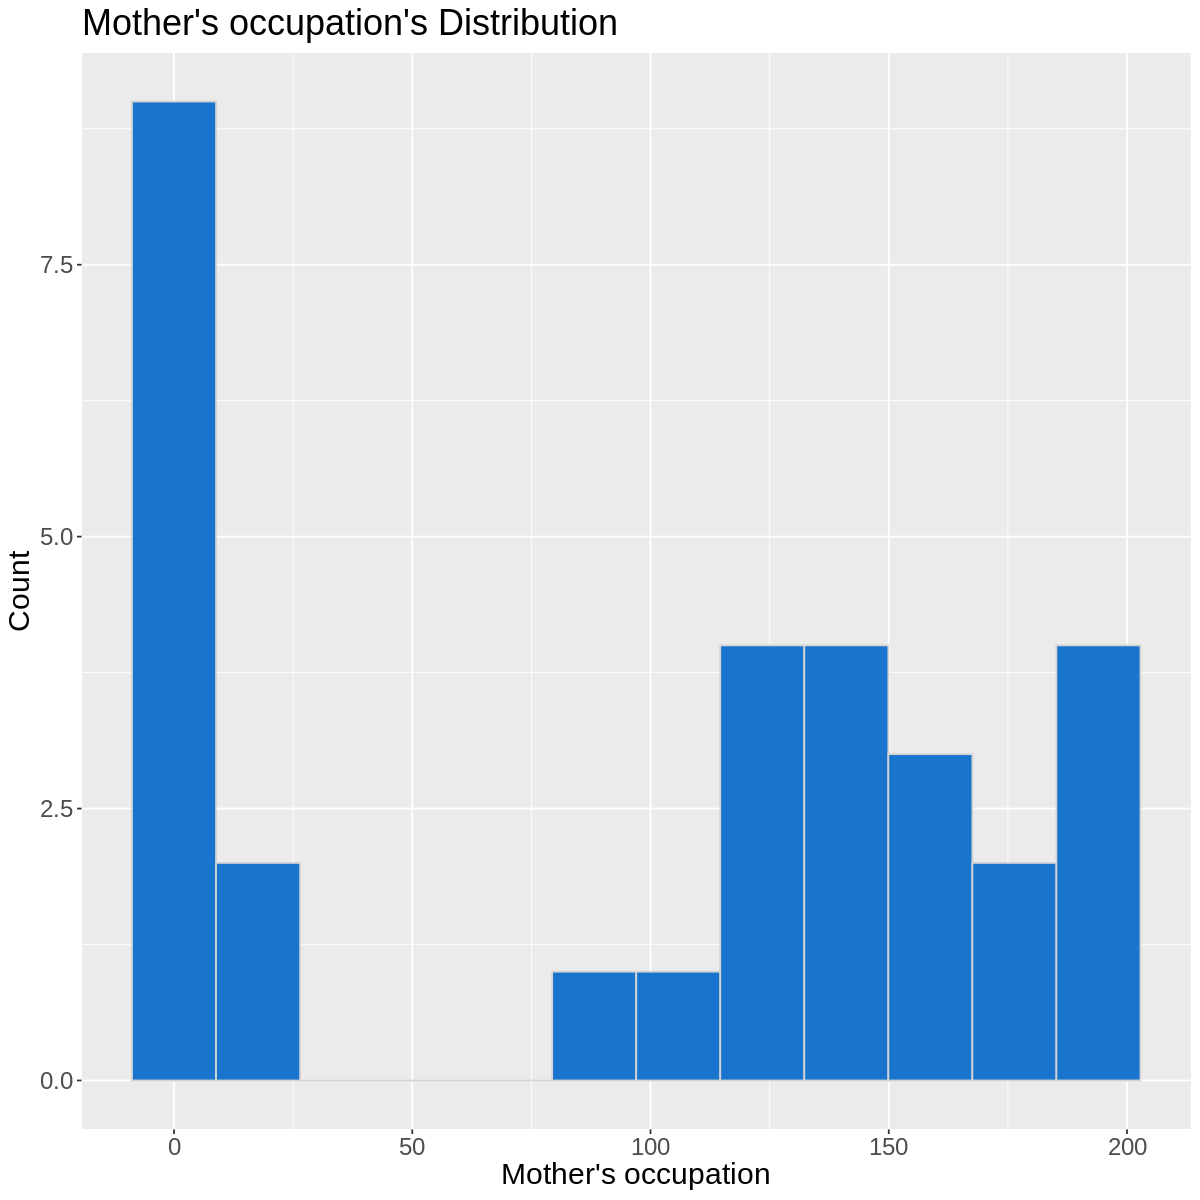

In [6]:
# visualizations
options(repr.plot.width = 10, repr.plot.height = 10)
mon_op_dis <- student_train |>
    ggplot(aes(x = Mother.s.occupation)) +
    geom_histogram(fill = "dodgerblue3", color = "lightgrey", bins = 12) +
    labs(x = "Mother's occupation", y = "Count", title = "Mother's occupation's Distribution") +
    theme(text = element_text(size = 18))
mon_op_dis

## Methods

Explain how you will conduct either your data analysis and which variables/columns you will use. 

The columns we choose: 
`Course`, 
`Daytime/evening attendance`, 
`Mother's qualification`,
`Father's qualification`,
`Mother's occupation`,
`Father's occupation`,
`Admission grade`,
`Displaced`,
`Debtor`,
`Scholarship holder`,
`Curricular units 1st sem (enrolled)`,
`Curricular units 1st sem (grade)`,
`Curricular units 2nd sem (enrolled)`,
`Curricular units 2nd sem (grade)`,
`Target`

Describe at least one way that you will visualize the results.

In this proposal, we will utilize the father's occupation as a visual representation. Firstly, we will create three distinct plots based on the dropout and academic success status categories: dropout, graduate, and enrolled. Subsequently, we will construct a histogram, with the father's occupation as the x-axis and the number of students as the y-axis. This histogram will allow us to observe the influence of different types of father's occupations on dropout rates and academic success statuses.

## Expected outcomes and significance

What do you expect to find?

We aim to examine the distribution of various factors in family background (such as father's occupation and mother's qualification), students' performance indicators (such as Curricular units 1st sem (enrolled) and Curricular units 1st sem (grade)), as well as financial conditions (including being displaced, debtor, or a scholarship holder). By doing so, we intend to identify the factors that significantly influence students' dropout rates and academic success statuses.

What impact could such findings have?

The results of this study can have a significant impact on educational institutions. Based on a review of the factors identified in the study on student academic outcomes, it can help administrators develop strategies that allow students from diverse backgrounds to improve their chances of success.

What future questions could this lead to?

By understanding these factors, educational institutions can develop corresponding approaches to help current students improve the successful graduation rates. The future questions leading to our project could be how educational institutions can set up more practical policies on scholarship to help students with financial difficulties to finish their degree successfully.

## Citation: 
background: https://www.mdpi.com/2306-5729/7/11/146